* ** Modalidades de trabajo (tiempo) **

* ** Seniority de los avisos **

* ** Zona de los avisos **

* ** Áreas de especialización más buscadas en los avisos **

* ** Empresas **

* ** Análisis de los primeros 130 caracteres/25 palabras (son los que se ven en la mini descripcion en zona jobs antes de clickear un aviso) de la descripcion (sin html) para ver cuales son las palabras mas relevantes.**

* ** Análisis de palabras más frecuentes en los títulos ** 

In [1]:
import numpy as np 
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS # Wordcloud: pip install wordcloud

%matplotlib inline

In [2]:
avisos_detalle = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [3]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [4]:
avisos_detalle.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

### **Limpieza**

In [5]:
avisos_detalle['idpais'].value_counts() 

1    13534
Name: idpais, dtype: int64

In [6]:
avisos_detalle = avisos_detalle.drop(['idpais'], axis=1)
avisos_detalle.columns

Index(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

In [7]:
avisos_detalle['mapacalle'].value_counts()

SARMIENTO 1937                      43
Microcentro                         30
Buenos Aires                        24
Palermo                             23
Barracas                            18
Puerto Madero                       15
Belgrano                            14
Reconquista 865                     13
retiro                              12
Recoleta                            10
Parque Patricios                    10
saavedra                             8
nuñez                                8
Peron 955                            7
Pasaje Aguado 628                    6
25 de Mayo 457 7º piso               6
Monserrat                            6
Mataderos                            6
San Telmo                            6
Amenábar 1074                        5
Av. Libertador 6810 4º A             5
calle 7 nº1565 e/64 y 65             5
Villa Soldati                        5
Nicasio Oroño 1420                   4
México 2051                          4
Gral. Roca 4530          

In [8]:
print("El", round(100 * avisos_detalle['mapacalle'].isnull().sum()/len(avisos_detalle), 2), "% de los datos de la columna mapacalle son nulos")

El 93.56 % de los datos de la columna mapacalle son nulos


In [9]:
avisos_detalle = avisos_detalle.drop(['mapacalle'], axis=1)
avisos_detalle.columns

Index(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

In [10]:
avisos_detalle['ciudad'].isnull().sum()

13487

In [11]:
print("El", round(100 * avisos_detalle['ciudad'].isnull().sum()/len(avisos_detalle), 2), "% de los datos de la columna ciudad son nulos")

El 99.65 % de los datos de la columna ciudad son nulos


In [12]:
avisos_detalle['ciudad'].value_counts()

Buenos Aires                14
Argentina                   13
CABA                         3
Capital Federal              2
San Isidro                   2
Tortuguitas                  1
Santa Rosa                   1
La Plata                     1
Mendoza                      1
Vicente Lopez                1
Buenos Aires Province        1
caba                         1
Microcentro                  1
Barracas                     1
Parque Patricios             1
República Argentina          1
Zárate, Campana, Escobar     1
paternal                     1
Name: ciudad, dtype: int64

In [13]:
avisos_detalle = avisos_detalle.drop(['ciudad'], axis=1)
avisos_detalle.columns

Index(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'tipo_de_trabajo',
       'nivel_laboral', 'nombre_area', 'denominacion_empresa'],
      dtype='object')

## **Análisis**

### **Seniority**

In [14]:
avisos_detalle['nivel_laboral'].isnull().sum()

0

In [15]:
avisos_detalle['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

<BarContainer object of 5 artists>

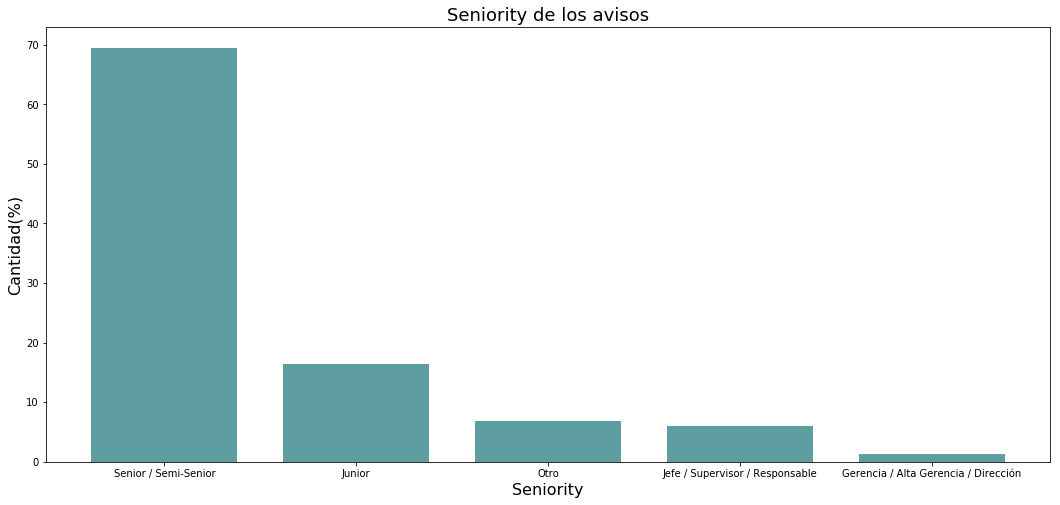

In [16]:
seniorities = ['Senior / Semi-Senior','Junior','Otro','Jefe / Supervisor / Responsable','Gerencia / Alta Gerencia / Dirección']
num_items=len(seniorities)
plt.figure(figsize=(18,8))
margin = 0.05
width = 4*(1.-1*margin)/num_items
plt.title('Seniority de los avisos', fontsize=18)
plt.xlabel('Seniority', fontsize=16)
plt.ylabel('Cantidad(%)', fontsize=16)
plt.bar(seniorities, 100 * avisos_detalle.nivel_laboral.value_counts()/len(avisos_detalle), width, color="cadetblue")

### **Modalidades de trabajo (tiempo)**

In [17]:
avisos_detalle['tipo_de_trabajo'].isnull().sum()

0

In [18]:
avisos_detalle['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

<BarContainer object of 9 artists>

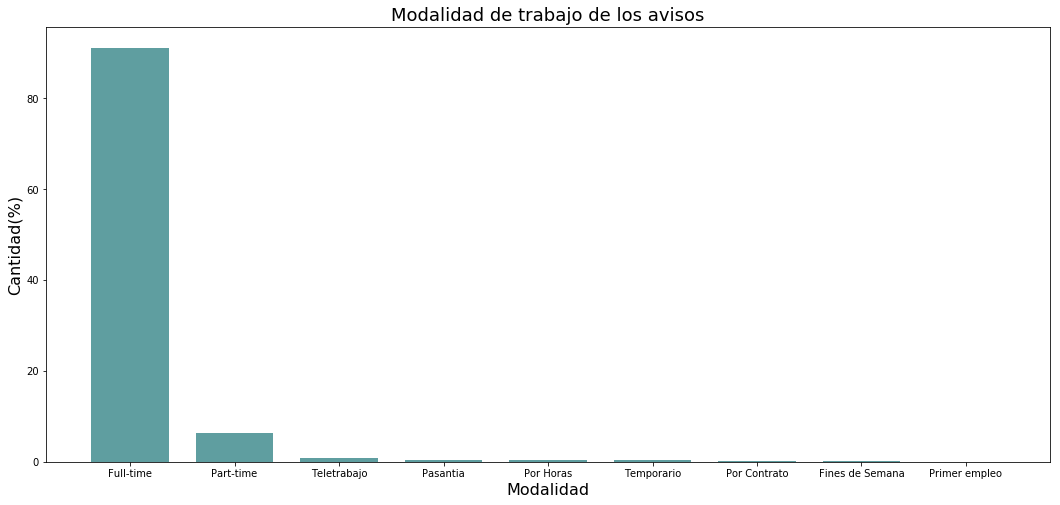

In [19]:
modalidades_trabajo = ['Full-time','Part-time','Teletrabajo','Pasantia','Por Horas','Temporario','Por Contrato','Fines de Semana','Primer empleo']
num_items=len(modalidades_trabajo)
plt.figure(figsize=(18,8))
margin = 0.05
width = 7*(1.-1*margin)/num_items
plt.title('Modalidad de trabajo de los avisos', fontsize=18)
plt.xlabel('Modalidad', fontsize=16)
plt.ylabel('Cantidad(%)', fontsize=16)
plt.bar(modalidades_trabajo, 100 * avisos_detalle.tipo_de_trabajo.value_counts()/len(avisos_detalle), width, color="cadetblue")


### **Zona de los avisos**

In [20]:
avisos_detalle['nombre_zona'].isnull().sum()

0

In [21]:
avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

<BarContainer object of 4 artists>

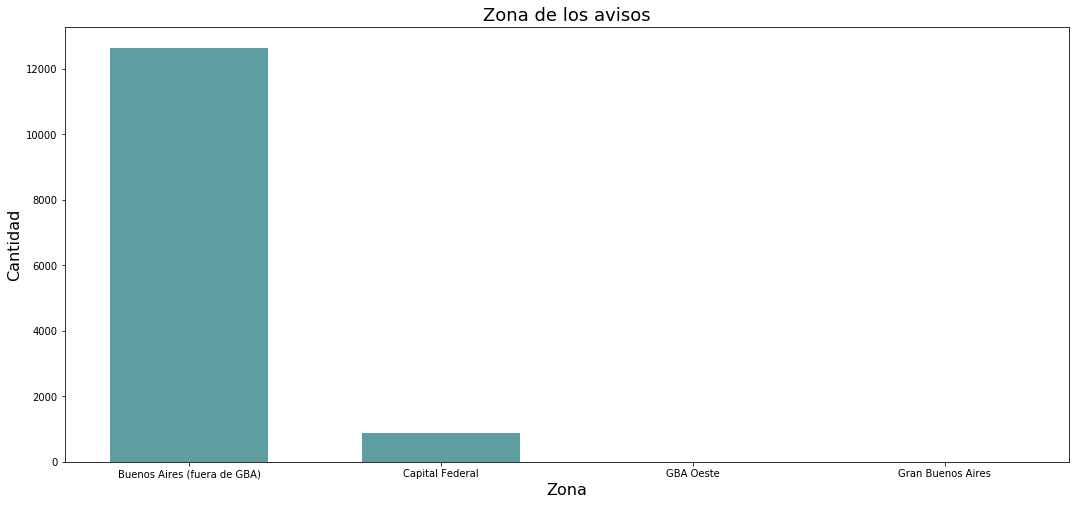

In [22]:
zona_avisos = ['Buenos Aires (fuera de GBA)','Capital Federal','GBA Oeste','Gran Buenos Aires']
num_items=len(zona_avisos)
plt.figure(figsize=(18,8))
margin = 0.5
width = 5*(1.-1*margin)/num_items
plt.title('Zona de los avisos', fontsize=18)
plt.xlabel('Zona', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.bar(zona_avisos, avisos_detalle.nombre_zona.value_counts(), width, color="cadetblue")

### **Área de especialización de los avisos**

In [23]:
avisos_detalle['nombre_area'].isnull().sum()

0

In [24]:
avisos_detalle['nombre_area'].value_counts()

Ventas                                   1659
Comercial                                 983
Administración                            901
Producción                                821
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Marketing                                 153
Otros                                     153
Administración de Personal                152
Recepcionista                             151
Transporte                        

In [25]:
# TOP 15 de las areas mas buscadas
grouped_by_area_avisos = avisos_detalle.groupby('nombre_area')['nombre_area']\
    .agg(['count']).sort_values(by='count', ascending=False).head(15)
grouped_by_area_avisos = grouped_by_area_avisos.apply(lambda row: 100 * row['count'] / len(avisos_detalle), axis=1)
grouped_by_area_avisos

nombre_area
Ventas                   12.258017
Comercial                 7.263189
Administración            6.657308
Producción                6.066204
Programación              4.255948
Contabilidad              3.073740
Tecnologia / Sistemas     2.866854
Atención al Cliente       2.563913
Mantenimiento             2.393971
Recursos Humanos          1.736368
Gastronomia               1.728979
Oficios y Profesiones     1.544259
Soporte Técnico           1.499926
Logística                 1.477760
Call Center               1.411261
dtype: float64

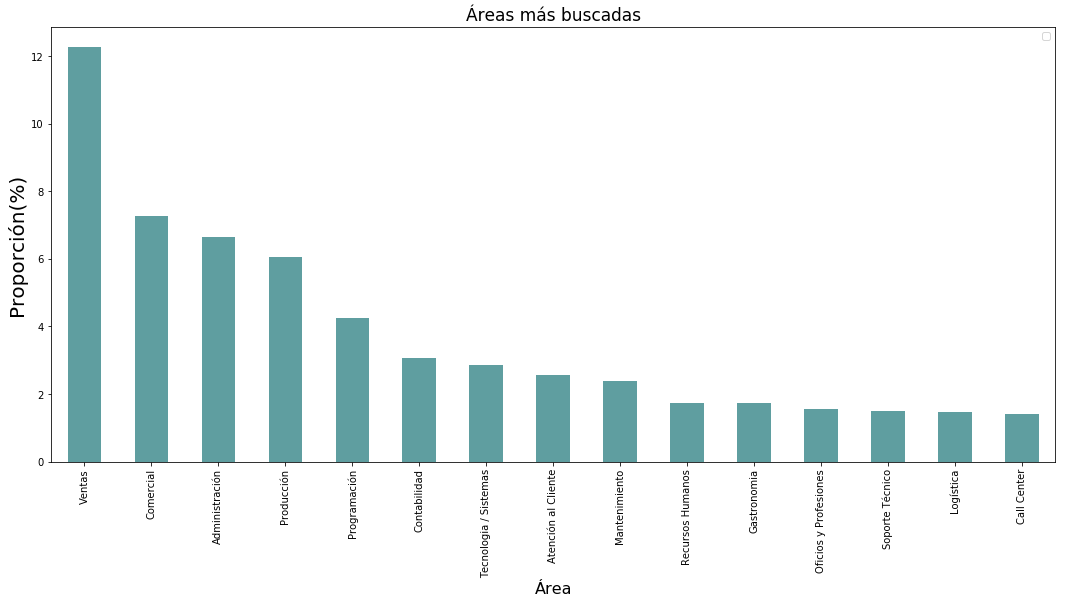

In [26]:
grouped_by_area_avisos.plot.bar(rot=0, figsize=(18,8), color='cadetblue', fontsize=10);
plt.ylabel('Proporción(%)', fontsize=20)
plt.xlabel('Área', fontsize=16)
plt.title('Áreas más buscadas', fontsize=17)
plt.legend('')
plt.xticks(rotation=90)
plt.show()

### **Empresas**

In [27]:
# TOP 20 empresas con más avisos
empresas_top = avisos_detalle.groupby('denominacion_empresa')['denominacion_empresa']\
    .agg(['count']).sort_values(by='count', ascending=False).head(20)
empresas_top = empresas_top.apply(lambda row: 100 * row['count'] / len(avisos_detalle), axis=1)
empresas_top

denominacion_empresa
RANDSTAD                              4.152505
Manpower                              3.118073
Grupo Gestión                         2.829910
Assistem                              2.135363
SOLUTIX S.A.                          1.921088
BAYTON                                1.758534
Pullmen Servicios Empresarios S.A.    1.692035
Adecco - Región NORTE & OESTE GBA     1.514704
Suministra                            1.499926
Adecco -Región Office                 1.477760
Consultores de Empresas SRL           1.455593
Complement Group (holding)            1.182208
Adecco -Región GBA SUR                1.182208
Kaizen Recursos Humanos               0.812768
Adecco  -Región Litoral               0.805379
IT Resources                          0.805379
CrossOver                             0.805379
Excelencia Laboral S.A.               0.724102
Suple                                 0.650214
Swiss Medical Group                   0.650214
dtype: float64

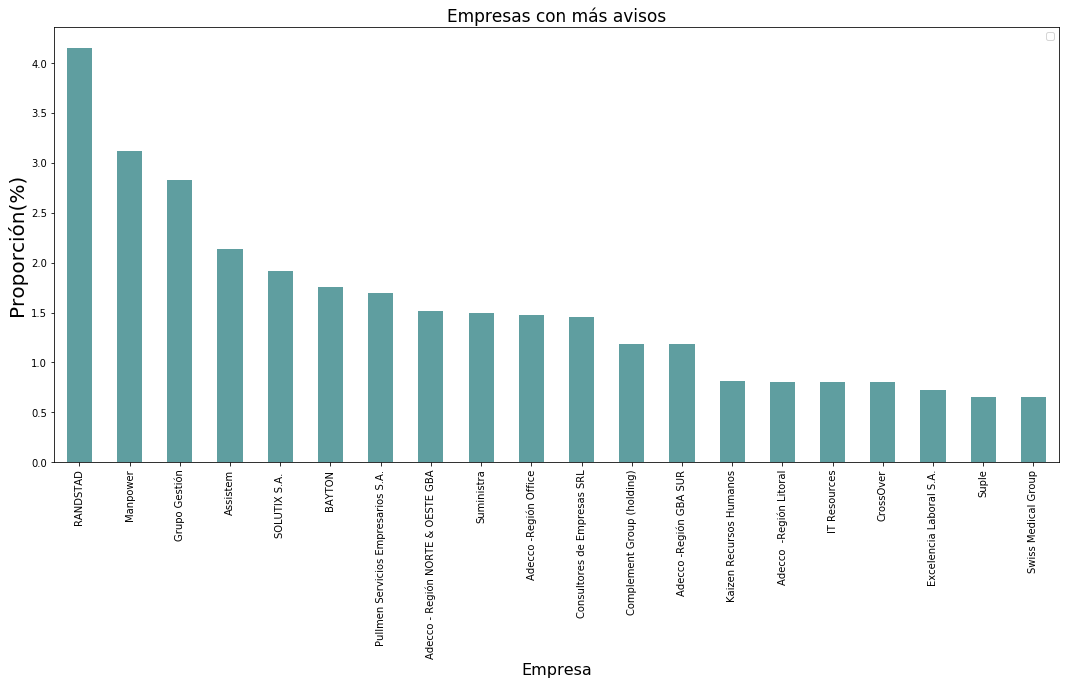

In [28]:
empresas_top.plot.bar(rot=0, figsize=(18,8), color='cadetblue', fontsize=10);
plt.ylabel('Proporción(%)', fontsize=20)
plt.xlabel('Empresa', fontsize=16)
plt.title('Empresas con más avisos', fontsize=17)
plt.legend('')
plt.xticks(rotation=90)
plt.show()

### **Analisis primeros caracteres de la descripcion**

In [29]:
def process_words(row, col, col_new):  
    row[col_new] = row[col]
    words = row[col_new].split()
    
    # Se filtran las stop words y los simbolos
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word.lower() == w):
                word = word.lower().replace(w, '')
        for inv in invalid_characters:
            word = word.lower().replace(inv, '')
        if (word != ''):
            valid_words.append(word)
        
    row[col_new] = set(valid_words) 
    return row

In [30]:
stopwords = ['a', 'al', 'ante', 'aquel', 'aires', 'bien', 'buenos', 'como', 'con', 'conseguir', 'cual', 'de', 'del', 
             'desde', 'donde', 'e', 'el', 'ella', 'ello', 'en', 'es', 'esa', 'encima', 'entonces', 'entre', 'encontramos', 'encuentra', 'era', 'esta', 'está',
             'estás', 'estas' 'estan', 'están', 'etc', 'fe', 'fue', 'ha', 'hacen', 'hacemos', 'hacer', 'hasta', 'incluso', 'ir', 'jamas', 
             'jamás', 'la', 'las', 'lo', 'los', 'más', 'me', 'menos', 'mi', 'mis', 'misma', 'mismo', 'mucha', 'muchas', 
             'mucho', 'muchos', 'muy', 'ni', 'no', 'nos', 'nosotros', 'nuestra', 'o', 'para', 'por', 'puesta', 'que', 'qué', 'sabe', 'santa', 'saber', 'se', 
             'según', 'ser', 'serán', 'seran', 'si', 'sí', 'siendo', 'sin', 'sobre', 'solo', 'solicita', 'somos', 'su', 'sus', 'te', 'tiene', 'tus', 'tu', 'uso', 
             'un', 'una', 'vaya', 'y']

invalid_characters = [',', ':', '.', ';', '', '?', '¿', '!', '¡', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                      '<', '>', '-', '_', '/', '*']

def clean_html(string):
    clean_html_regex = re.compile('<.*?>')
    string = re.sub(clean_html_regex, '', string)
    return string

def process_top_words(row, col, col_new):  
    row[col] = clean_html(row[col])
    row[col_new] = row[col]
    # Se conservan los primeros 130 caracteres que son los que se ven en la vista previa
    # Descarto este enfoque porque se pierden algunas palabras que quedan partidas en la mitad
    #row['descripcion'] = row['descripcion'][0:130] 
    
    # En cambio nos quedamos con las primeras n palabras
    words = row[col_new].split()
    words = words[:25]
    
    # Se filtran las stop words y los simbolos
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word.lower() == w):
                word = word.lower().replace(w, '')
        for inv in invalid_characters:
            word = word.lower().replace(inv, '')
        if (word != ''):
            valid_words.append(word)
        
    row[col_new] = set(valid_words) 
    return row

In [31]:
avisos_detalle = avisos_detalle.apply(lambda row: process_top_words(row, 'descripcion', 'descripcion_top_words_small'), axis=1)

In [32]:
avisos_detalle['descripcion_top_words_small'][10]

{'cruz',
 'incorporar',
 'minera',
 'operación',
 'paramedico',
 'proceso',
 'provincia',
 'puede',
 'selección',
 'ubicada'}

In [33]:
avisos_detalle.head(2)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au..."
1,17903700,Enfermeras,Solicitamos para importante cadena de farmacia...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,"{farmacias, zona, experiencia, zoeste, añosres..."


In [34]:
lista_palabras_frecuentes_descripcion_small = []

def add_word(row, columna):
    words = row[columna]
    for word in words:
        lista_palabras_frecuentes_descripcion_small.append(word)

avisos_detalle.apply(lambda row: add_word(row, 'descripcion_top_words_small'), axis=1)
avisos_detalle.head(1)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au..."


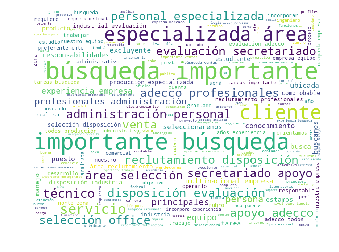

In [35]:
text = ''
for word in lista_palabras_frecuentes_descripcion_small:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = stopwords, width=800, height=600,
                      background_color="white"
                      ).generate(text)
wordcloud.to_file('./wc1.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### **Palabras más frecuentes en los títulos**

In [36]:
avisos_detalle = avisos_detalle.apply(lambda row: process_words(row, 'titulo', 'titulo_top_words'), axis=1)

In [37]:
avisos_detalle.head(2)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small,titulo_top_words
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au...","{provincia, vendedora}"
1,17903700,Enfermeras,Solicitamos para importante cadena de farmacia...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,"{farmacias, zona, experiencia, zoeste, añosres...",{enfermeras}


In [38]:
lista_palabras_frecuentes_titulos = []

def add_word(row, columna):
    words = row[columna]
    for word in words:
        lista_palabras_frecuentes_titulos.append(word)

avisos_detalle.apply(lambda row: add_word(row, 'titulo_top_words'), axis=1)
avisos_detalle.head(1)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small,titulo_top_words
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au...","{provincia, vendedora}"


In [39]:
# TOP 20 palabras mas frecuentes en el titulo
from collections import Counter
words_to_count = (word for word in lista_palabras_frecuentes_titulos if word[:1])
c = Counter(words_to_count)
print (c.most_common(20))
count_palabras_frecuentes_titulos = c.most_common(20)

[('analista', 1777), ('zona', 1299), ('técnico', 642), ('comercial', 621), ('administrativo', 546), ('ventas', 538), ('vendedor', 528), ('contable', 459), ('sr', 455), ('caba', 421), ('jefe', 414), ('asistente', 391), ('importante', 386), ('empresa', 360), ('supervisor', 346), ('jr', 339), ('ejecutivo', 335), ('mantenimiento', 323), ('norte', 322), ('ingeniero', 298)]


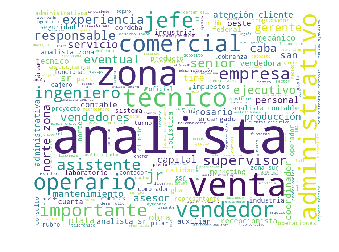

In [40]:
text = ''
for word in lista_palabras_frecuentes_titulos:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = stopwords, width=800, height=600,
                      background_color="white"
                      ).generate(text)
wordcloud.to_file('./wc2.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### **Palabras más frecuentes en la descripción**

In [41]:
avisos_detalle = avisos_detalle.apply(lambda row: process_words(row, 'descripcion', 'descripcion_top_words'), axis=1)

In [42]:
lista_palabras_frecuentes_descripcion = []

def add_word(row, columna):
    words = row[columna]
    for word in words:
        lista_palabras_frecuentes_descripcion.append(word)

avisos_detalle.apply(lambda row: add_word(row, 'descripcion_top_words'), axis=1)
avisos_detalle.head(1)

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,descripcion_top_words_small,titulo_top_words,descripcion_top_words
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,"Empresa: Distribuidor de repuestos automotor, ...",Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR,"{agrícolas, industriales, ventaspaísciudad, au...","{provincia, vendedora}","{agrícolas, rosari, presenciamovilidad, feindu..."


In [43]:
# TOP 25 palabras mas frecuentes en la descripción
from collections import Counter
words_to_count = (word for word in lista_palabras_frecuentes_descripcion if word[:1])
c = Counter(words_to_count)
print (c.most_common(25))
count_palabras_frecuentes_descripcion = c.most_common(25)

[('experiencia', 9591), ('trabajo', 7209), ('empresa', 6881), ('búsqueda', 6525), ('importante', 5911), ('años', 5160), ('equipo', 4304), ('tareas', 4136), ('lunes', 3909), ('requisitos', 3859), ('zona', 3841), ('manejo', 3778), ('viernes', 3546), ('conocimientos', 3311), ('hs', 3242), ('principales', 3239), ('laboral', 3204), ('cliente', 3185), ('condiciones', 3146), ('empresas', 2994), ('contratación', 2938), ('desarrollo', 2808), ('área', 2777), ('disponibilidad', 2755), ('excluyente', 2752)]


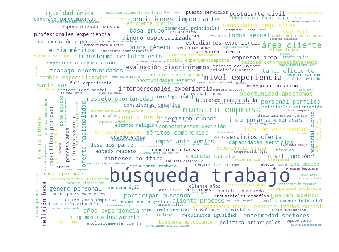

In [44]:
text = ''
for word in lista_palabras_frecuentes_descripcion:
    text += ' ' + word
wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = stopwords, width=800, height=600,
                      background_color='white'
                      ).generate(text)
wordcloud.to_file('wc3.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()